<a href="https://colab.research.google.com/github/maggiecrowner/labs_fork/blob/main/5_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 5 The Bootstrap - Maggie Crowner

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 7.33 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Question 2

###Part 1

In [5]:
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [8]:
ct = pd.crosstab( df['treatment'], df['breast_cancer_death'])
print(ct)

difference = (44405/(44405+505)) - (44425/(44425+500))
print('Difference in survival rate: ', difference)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
Difference in survival rate:  -0.00011505110015985753


The mammogram group had a lesser survival rate than the control group by 0.000115, or 0.0115%. Approximately, the two groups have the same survival rate.

###Part 2

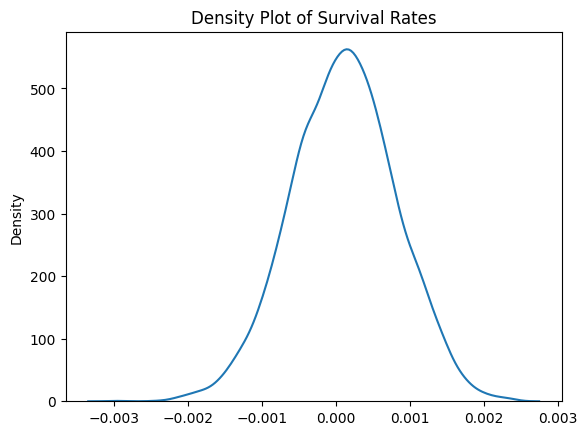

In [16]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

mammogram = df.loc[ df['treatment'] == 'mammogram', :]
control = df.loc[ df['treatment'] == 'control', :]

effects = []
for i in range(5000):
  mammogram_i = mammogram.sample(mammogram.shape[0], axis=0, replace=True)
  control_i = control.sample(control.shape[0], axis=0, replace=True)
  effect = np.mean(mammogram_i['survive']) - np.mean(control_i['survive'])
  effects.append(effect)

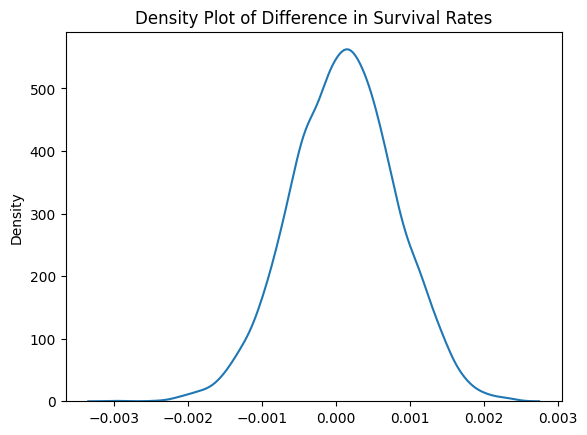

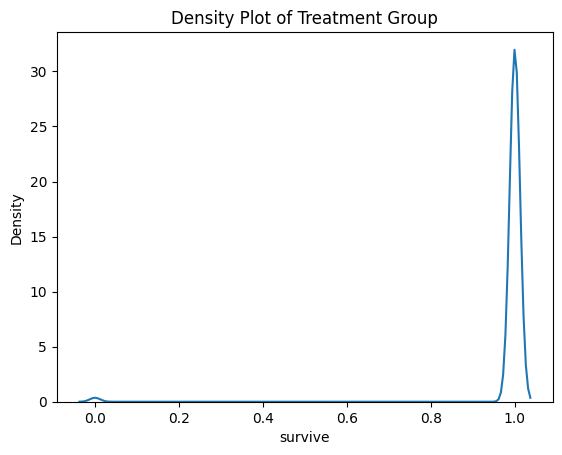

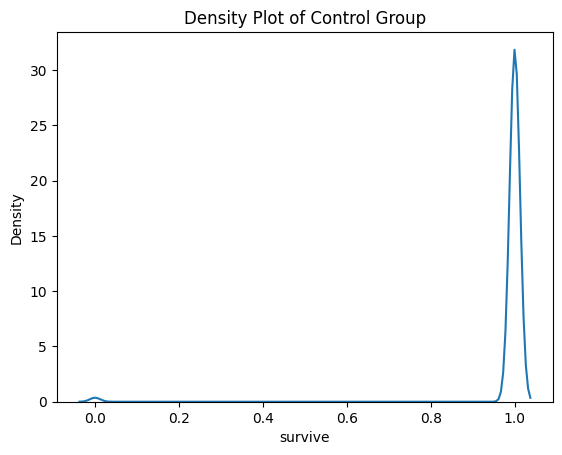

In [20]:
sns.kdeplot(effects)
plt.title("Density Plot of Difference in Survival Rates")
plt.show()

sns.kdeplot(mammogram['survive'])
plt.title("Density Plot of Treatment Group")
plt.show()

sns.kdeplot(control['survive'])
plt.title("Density Plot of Control Group")
plt.show()

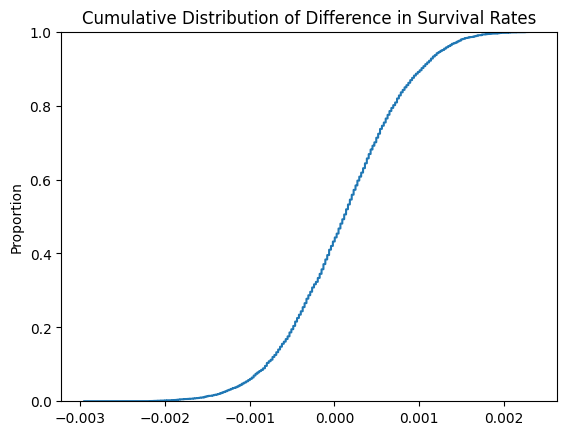

In [22]:
sns.ecdfplot(effects)
plt.title("Cumulative Distribution of Difference in Survival Rates")
plt.show()

###Part 3

In [24]:
lower_bound = np.quantile(effects, .005 )
upper_bound = np.quantile(effects, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

99% confidence interval: ( -0.0018216591595358505 ,  0.0018740425759699519 )


The confidence interval does include zero. This suggests that mammograms have no significant effect on survival rates.

###Part 4

We have very little information about the population and procedure from which data was sampled for this dataset, which means we can't generalize the results to any particular population or circumstances. These conclusions may be biased if the treatment was not randomly assigned, the data was not randomly sampled, or based on other factors such as location, socioeconomic status, family members, etc. from the population. For example, if some people are related it's possible that correlates with their trajectory with breast cancer. Other risk factors may be present too - we have no information on that. We also have no information on how far along the cancer was or what doctors were treating it.

##Question 3

###Part 1

In [26]:
df = pd.read_csv('/content/the_bootstrap/data/diabetes_hw.csv')
ct = pd.crosstab(df['treatment'], df['outcome'])
print(ct)

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143


###Part 2

In [27]:
print("lifestyle success rate: ", 125/(109+125))
print("met success rate: ", 112/(120+112))
print("rosi success rate: ", 143/(90+143))

lifestyle success rate:  0.5341880341880342
met success rate:  0.4827586206896552
rosi success rate:  0.6137339055793991


rosi appears to be the most effective treatment, with a 61.37% success rate.

###Part 3

In [31]:
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1
lifestyle = df.loc[ df['treatment'] == 'lifestyle', :]
rosi = df.loc[ df['treatment'] == 'rosi', :]
met = df.loc[ df['treatment'] == 'met', :]

lifestyle1 = []
met1 = []
rosi1 = []
for i in range(100):
  lif_i = lifestyle.sample(lifestyle.shape[0], axis=0, replace=True)
  met_i = met.sample(met.shape[0], axis=0, replace=True)
  ros_i = rosi.sample(rosi.shape[0], axis=0, replace=True)
  lif_m = np.mean(lif_i['success'])
  met_m = np.mean(met_i['success'])
  ros_m = np.mean(ros_i['success'])
  lifestyle1.append(lif_m)
  met1.append(met_m)
  rosi1.append(ros_m)

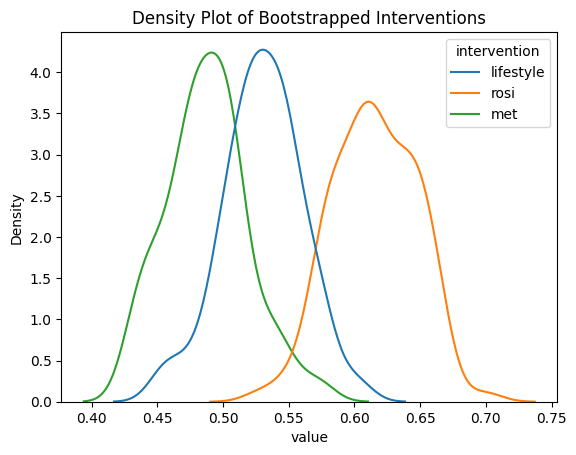

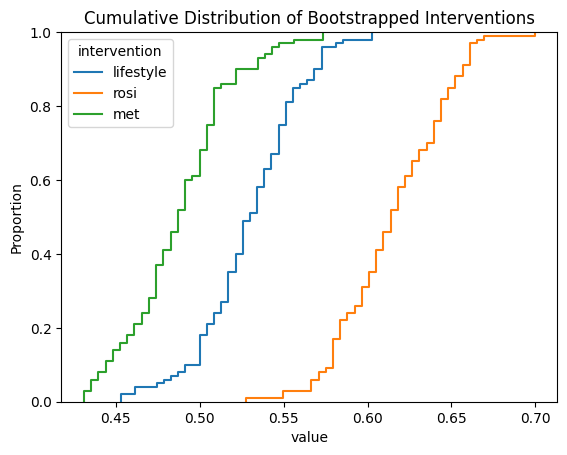

In [33]:
df_lif = pd.DataFrame({'value':lifestyle1, 'intervention':'lifestyle'})
df_ros = pd.DataFrame({'value':rosi1, 'intervention':'rosi'})
df_met = pd.DataFrame({'value':met1, 'intervention':'met'})
df_boot = pd.concat([df_lif, df_ros, df_met], axis=0)

sns.kdeplot(data=df_boot, x='value', hue = 'intervention')
plt.title("Density Plot of Bootstrapped Interventions")
plt.show()

sns.ecdfplot(data=df_boot, x='value', hue = 'intervention')
plt.title("Cumulative Distribution of Bootstrapped Interventions")
plt.show()

rosi appears to have the highest success rate in both plots.

###Part 4

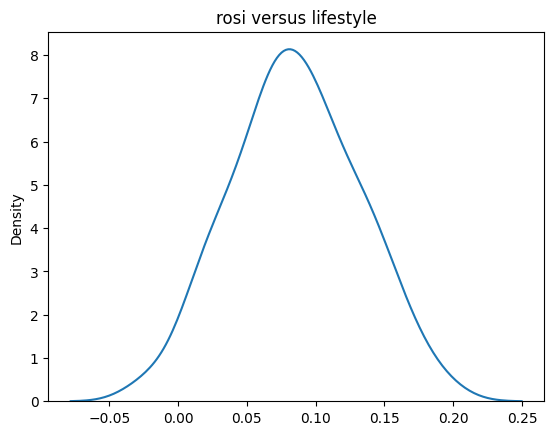

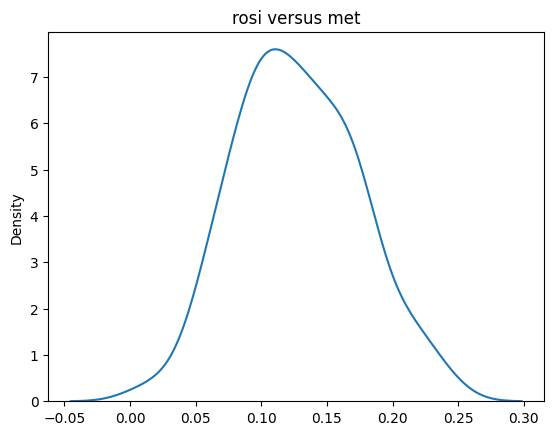

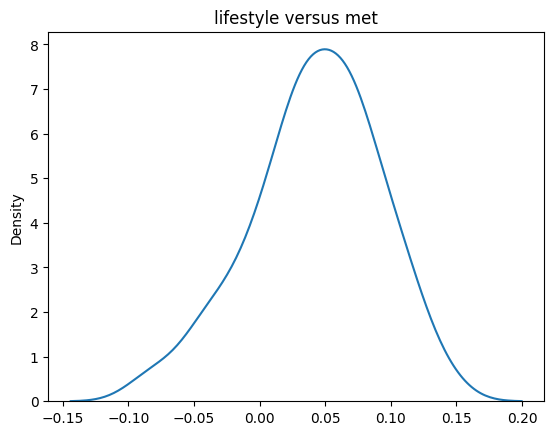

90% CI for rosi minus lifestyle:  0.011163383588276293 ,  0.160752540258978
90% CI for rosi minus met:  0.058061084800947155 ,  0.20859479058753877
90% CI for lifestyle minus met:  -0.04330238726790454 ,  0.11159556439728853


In [36]:
rosi_lifestyle = np.array(rosi1) - np.array(lifestyle1)
sns.kdeplot(x=rosi_lifestyle)
plt.title("rosi versus lifestyle")
plt.show()

rosi_met = np.array(rosi1) - np.array(met1)
sns.kdeplot(x=rosi_met)
plt.title("rosi versus met")
plt.show()

lif_met = np.array(lifestyle1) - np.array(met1)
sns.kdeplot(x=lif_met)
plt.title("lifestyle versus met")
plt.show()

print('90% CI for rosi minus lifestyle: ', np.quantile(rosi_lifestyle,.05), ', ', np.quantile(rosi_lifestyle,.95))
print('90% CI for rosi minus met: ', np.quantile(rosi_met,.05), ', ', np.quantile(rosi_met,.95))
print('90% CI for lifestyle minus met: ', np.quantile(lif_met,.05), ', ', np.quantile(lif_met,.95))

rosi versus lifestyle and rosi versus met are significantly different in success rates according to the plots and CIs. lifestyle versus met are not significantly different in success rate according to the plot and CI.

###Part 5

Overall, rosi seems to be the most effective. According to the initial proportion comparison, the bootstrapped comparison, and the group-by-group comparisons, rosi was significant each time. However, this is just based on this dataset and may not be true of the entire world. All of these treatment methods probably have some benefit to some people.